In [1]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv("bank.csv")

In [3]:
# shape of the dataset
data.shape

(11162, 17)

In [4]:
# first 5 rows data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# describing the dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
# information about each cloumn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
# checking null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

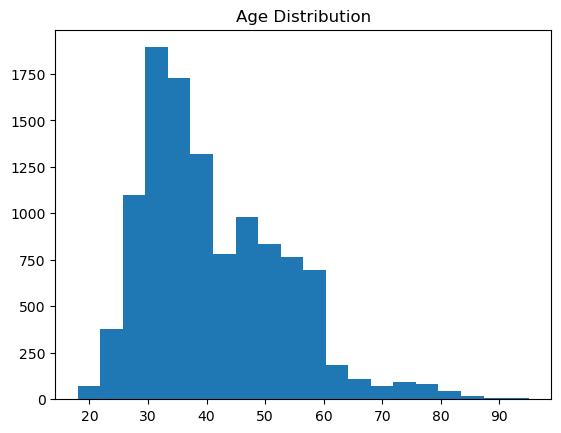

In [8]:
plt.hist(data['age'],bins=20)
plt.title("Age Distribution")
plt.show()

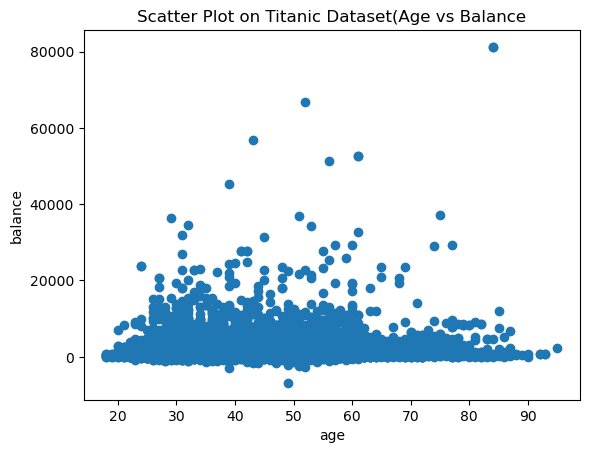

In [9]:
# scatter plot Age vs Fare
plt.scatter(data["age"],data["balance"])
plt.xlabel("age")
plt.ylabel("balance")
plt.title("Scatter Plot on Titanic Dataset(Age vs Balance")
plt.show()

In [10]:
X = data[['age']]
y = data['balance']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))


KNN MSE: 12066213.57193014


In [12]:
# Predict on test data (already available)
y_pred = knn.predict(X_test)

print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Values:", y_test.values[:10])

First 10 Predictions: [4807.2 2629.2  166.2  326.6  166.2 1766.2  326.6 1843.6  166.2  514.8]
First 10 Actual Values: [  744  1627  4963  8229  1473   119  3434   771  3443 10086]


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree MSE: 11456971.72581541


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert balance to binary class
data['balance_class'] = (data['balance'] > data['balance'].median()).astype(int)

X_cls = data[['age']]
y_cls = data['balance_class']

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.535602328705777


In [15]:
print("Logistic Regression MSE:", mean_squared_error(y_test, y_pred_log))

Logistic Regression MSE: 0.464397671294223


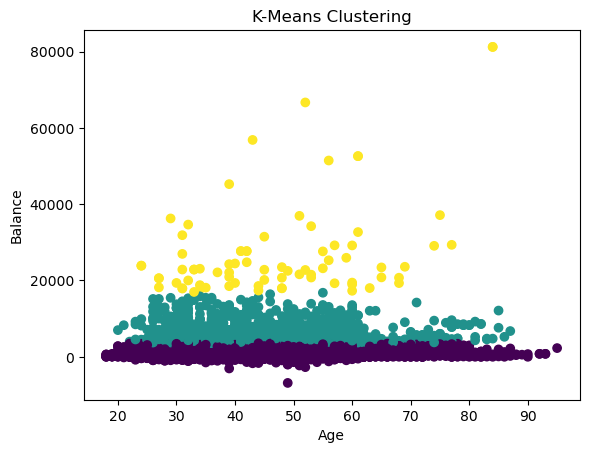

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_cluster = data[['age', 'balance']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)

# Visualization
plt.scatter(data['age'], data['balance'], c=data['cluster'])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("K-Means Clustering")
plt.show()


In [17]:
kmeans.fit(X_train,y_train)

KMeans(n_clusters=3, random_state=42)

In [18]:
y_pred_kmeans=kmeans.predict(X_test)

In [19]:
print("KMeans MSE:", mean_squared_error(y_test, y_pred_kmeans))

KMeans MSE: 1.1724137931034482


In [20]:
mse = {
    "Logistic Regression" :  0.464397671294223,
    "KNN": 12474850.12257949,
    "Decision Tree": 11456971.72581541,
    "KMeans" : 1.1724137931034482
}

best_algorithm = max(mse, key=mse.get)
# Print Result
print("Best Algorithm")
print(f"Algorithm:{best_algorithm}")
print(f"MSE:{mse[best_algorithm]:.3f}")

Best Algorithm
Algorithm:KNN
MSE:12474850.123


In [21]:
# Prediction
age = [[20]]
predicted_balance =knn.predict(age)

print(f"Predicted balance for age {age[0][0]}: {predicted_balance[0]:.2f}")

Predicted balance for age 20: 584.20


C:\Users\anu_m\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [22]:
# Output
if predicted_balance[0] > 1000:
    print("Prediction: YES (Customer will subscribe)")
else:
    print("Prediction: NO (Customer will not subscribe)")

Prediction: NO (Customer will not subscribe)
